Dataset Loaded Successfully.


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



--- Missing Values ---


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Duplicate Rows: 0

--- Cleaned Dataset Overview ---


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sub-category,product_name,sales,quantity,discount,profit,profit_margin,cost,year,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,220.0464,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,512.3580,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,7.7486,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,1340.6085,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,19.8516,2015,October



Shape of Cleaned Data: (9994, 25)

Missing Values After Cleaning:
0

Cleaned dataset saved to: superstore_cleaned.csv


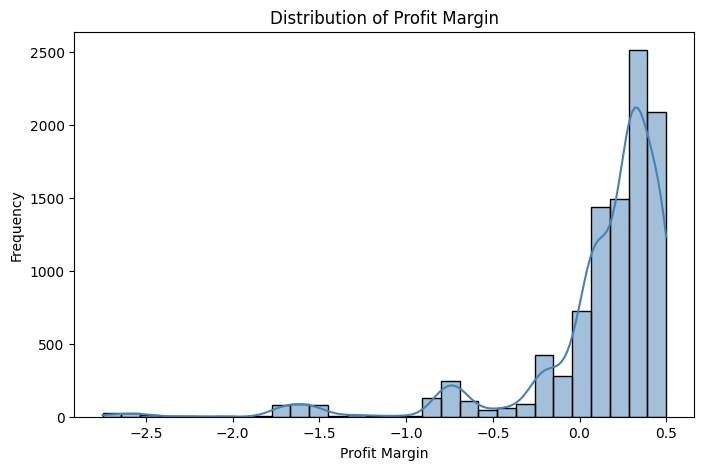

In [1]:
# 01_data_cleaning.ipynb
# ProfitPulse: Data-Driven Cost Optimization for a Retail Chain
# Step 1: Data Cleaning and Preparation

# -----------------------------
# 1. Import Required Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# 2. Load Dataset
# -----------------------------
# Update path if dataset is stored elsewhere
data_path = "superstore.csv"
df = pd.read_csv(data_path, encoding='latin-1')

# Display initial rows
print("Dataset Loaded Successfully.\n")
df.head()

# -----------------------------
# 3. Basic Dataset Information
# -----------------------------
print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe())

print("\n--- Missing Values ---")
display(df.isnull().sum())

# -----------------------------
# 4. Data Cleaning
# -----------------------------

# Remove duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")
df = df.drop_duplicates()

# Handle missing values if any
df = df.fillna(0)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'order_date' and 'ship_date' to datetime
if 'order_date' in df.columns and 'ship_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['ship_date'] = pd.to_datetime(df['ship_date'])

# Ensure numerical columns are correct data types
num_cols = ['sales', 'profit', 'quantity', 'discount']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# -----------------------------
# 5. Feature Engineering
# -----------------------------

# Add profit margin
if 'profit' in df.columns and 'sales' in df.columns:
    df['profit_margin'] = df['profit'] / df['sales']

# Add cost column
df['cost'] = df['sales'] - df['profit']

# Add year and month columns for time-based analysis
if 'order_date' in df.columns:
    df['year'] = df['order_date'].dt.year
    df['month'] = df['order_date'].dt.month_name()

# -----------------------------
# 6. Data Validation
# -----------------------------
print("\n--- Cleaned Dataset Overview ---")
display(df.head())

print("\nShape of Cleaned Data:", df.shape)
print("\nMissing Values After Cleaning:")
print(df.isnull().sum().sum())

# -----------------------------
# 7. Save Cleaned Dataset
# -----------------------------
cleaned_data_path = "superstore_cleaned.csv"
df.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_data_path}")

# -----------------------------
# 8. Quick Visual Check
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['profit_margin'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()
